## Numerical Calculation of Transmission coefficient for the rectangular barrier of height V$_0$ and width 2a

### Load libraries

In [50]:
import math, cmath
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from IPython.display import clear_output

### Enter conditions

In [63]:
a    = 2 # barrier width is 2a, spanning from -a to +a
V0   = 1 # barrier height is V0
m    = 1 # mass of particles, mass of electron is 1 in atomic units
hbar = 1 # in atomic units

#=== Energy range
E0=0.005                # lower bound for E
Ef=10                   # upper bound for E
dE=0.01                 # step of E
NE=int((Ef-E0)/dE+1)    # number of steps

### Solve scattering equations for various values of energy (E) of the particle beam

In [64]:
# Energies and transmission coefficients to be stored
E=np.zeros(NE)
T=np.zeros(NE)

In [65]:
for iE in range(NE):
    
    E[iE]=E0+iE*dE
    
    k1 = cmath.sqrt(2*m*E[iE])/hbar
    k2 = cmath.sqrt(2*m*(E[iE]-V0))/hbar

    #=== Scattering matrix
    A=np.zeros((4,4))
    A = [
    [ -np.exp(1j*k1*a), np.exp(-1j*k2*a),         np.exp(1j*k2*a),           0               ],
    [  np.exp(1j*k1*a), (k2/k1)*np.exp(-1j*k2*a), (-k2/k1)*np.exp(1j*k2*a),  0               ], 
    [  0,               np.exp(1j*k2*a),          np.exp(-1j*k2*a),         -np.exp(1j*k1*a) ], 
    [  0,               (k2/k1)*np.exp(1j*k2*a),  (-k2/k1)*np.exp(-1j*k2*a),-np.exp(1j*k1*a) ]
    ]

    #=== Find inverse
    Ainv = np.linalg.pinv(A)

    #=== RHS
    b=np.zeros(4)
    b = [np.exp(-1j*k1*a),np.exp(-1j*k1*a),0,0 ]

    #=== Find left hand side as inv(A)*b
    x=np.dot(Ainv,b)
    #x = [B/A, C/A, D/A, F/A]

    #=== F/A is the fourth element of x
    F_A = x[3]
    
    T[iE] = np.real(F_A)**2 + np.imag(F_A)**2
    #print(iE,E[iE],T[iE])

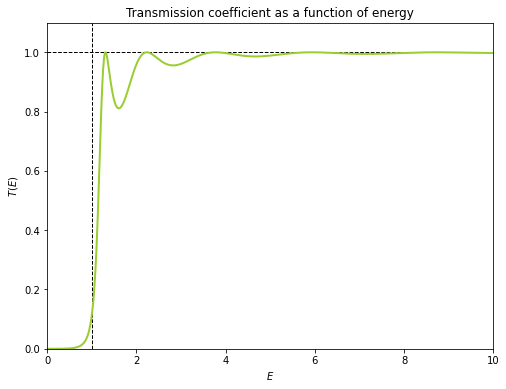

In [66]:
clear_output(wait=True)
plt.rcParams['figure.figsize'] = (8,6)
fig, ax = plt.subplots()
plt.title('Transmission coefficient as a function of energy')

#plt.grid(True)

plt.xlim(0,10)
plt.ylim(0,1.1)

plt.xlabel('$E$')
plt.ylabel('$T$($E$)')

x = [1,1]
y = [0,1.1]
plt.plot(x,y, color='k', linestyle='--',linewidth=1) 
        

x = [0,10]
y = [1,1]
plt.plot(x,y, color='k', linestyle='--',linewidth=1) 
    
plt.plot(E, T, color='yellowgreen', linestyle='-',linewidth=2) 
plt.savefig('rectangular_step.png')
plt.show()